# KNN Exercises

Create a new notebook, knn_model, and work with the titanic dataset. 

**Imports**

In [71]:
import numpy as np
import pandas as pd
from sklearn.neighbors import KNeighborsClassifier
import acquire
from prepare import prep_titanic_data
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report, confusion_matrix

import warnings
warnings.filterwarnings("ignore")

**Acquire & Prepare**

In [72]:
# Acquire Step
df = acquire.get_titanic_data()

# prepare the data
train, validate, test = prep_titanic_data(df)

# drop object columns and create X_train of features only 
# and y_train of survived only. 
X_train = train.drop(columns=['survived','sex','embark_town'])
y_train = train.survived

X_validate = validate.drop(columns=['survived','sex', 'embark_town'])
y_validate = validate.survived

X_test = test.drop(columns=['survived','sex', 'embark_town'])
y_test = test.survived

# check the shape
X_train.shape, X_validate.shape, X_test.shape

((498, 9), (214, 9), (179, 9))

**Explore**

* Think back to your Explore lesson and ask questions you want to know about the data
* Make decisions on which varaibles to keep and which to discard
* Accomplish feature engineering to provide the model with new variables

**Model**

0. Baseline (mode of the target for classification problems)
1. Model 1 (KNN with k=5 and features=[]):
    1. Create Algorithm Object
    2. Create Model by fitting algorithm to X_train, y_train
    3. Run Model by predicting using X_train
    4. Evaluate Model by comparing y_train_pred with y_train (actual values)
2. Model 2 (RF with max_depth=10):
    1. Create Algorithm Object
    2. Create Model by fitting algorithm to X_train, y_train
    3. Run Model by predicting using X_train
    4. Evaluate Model by comparing y_train_pred with y_train (actual values)
3. Model 3 (KNN with a different K)
    1. Create Algorithm Object
    2. Create Model by fitting algorithm to X_train, y_train
    3. Run Model by predicting using X_train
    4. Evaluate Model by comparing y_train_pred with y_train (actual values)
4. Model 4 (RF with different set of features)
5. ...

5. Select top 3 models and run through validate (to check for overfitting)
    1. Run Model1 by predicting using X_validate
    2. Evaluate Model1 by comparing y_validate_pred with y_validate (actual values)
    3. Run Model2 by predicting using X_validate
    2. Evaluate Model2 by comparing y_validate_pred with y_validate (actual values)
    3. Run Model3 by predicting using X_validate
    2. Evaluate Model3 by comparing y_validate_pred with y_validate (actual values)

6. Select the top model and run it through test (to estimate how we expect the model to perform in the future and new data)

**Baseline**

Let's make this easier next time, by writing a function to compute the baseline accuracy for classification problems. 

In [75]:
# write a function to compute the baseline for a classification model

def establish_baseline(y_train):
    #  establish the value we will predict for all observations
    baseline_prediction = y_train.mode()

    # create a series of predictions with that value, 
    # the same length as our training set
    y_train_pred = pd.Series([0]*len(y_train))

    # compute accuracy of baseline
    cm = confusion_matrix(y_train, y_train_pred)
    tn, fp, fn, tp = cm.ravel()

    accuracy = (tp+tn)/(tn+fp+fn+tp)
    return accuracy

In [76]:
establish_baseline(y_train)

0.6164658634538153

1. Fit a K-Nearest Neighbors classifier to your training sample and transform (i.e. make predictions on the training sample)

In [78]:
knn = KNeighborsClassifier()
knn.fit(X_train, y_train)
y_train_pred = knn.predict(X_train)

2. Evaluate your results using the model score, confusion matrix, and classification report.

In [79]:
# model score
accuracy_train = knn.score(X_train, y_train)
accuracy_train

0.7931726907630522

In [80]:
# confusion matrix
cm = confusion_matrix(y_train, y_train_pred)
pd.DataFrame(cm, index=['Actual 0', 'Actual 1'], 
             columns=['Pred 0', 'Pred 1'])

,Pred 0,Pred 1
Actual 0,258,49
Actual 1,54,137


In [81]:
# classification report
pd.DataFrame(classification_report(y_train, 
                                   y_train_pred, 
                                   output_dict=True))

,0,1,accuracy,macro avg,weighted avg
precision,0.826923,0.736559,0.793173,0.781741,0.792265
recall,0.840391,0.717277,0.793173,0.778834,0.793173
f1-score,0.833603,0.726790,0.793173,0.780197,0.792636
support,307.000000,191.000000,0.793173,498.000000,498.000000


3. Print and clearly label the following: Accuracy, true positive rate, false positive rate, true negative rate, false negative rate, precision, recall, f1-score, and support.

In [82]:
def print_cm_metrics(cm):
    # extract tp, tn, fp, fn from the confusion matrix to use in calculations
    tn, fp, fn, tp = cm.ravel()

    accuracy = (tp + tn)/(tn + fp + fn + tp)
    print(f"Accuracy: {accuracy}")

    true_positive_rate = tp/(tp + fn)
    print(f"True Positive Rate: {true_positive_rate}")

    false_positive_rate = fp/(fp + tn)
    print(f"False Positive Rate: {false_positive_rate}")

    true_negative_rate = tn/(tn + fp)
    print(f"True Negative Rate: {true_negative_rate}")

    false_negative_rate = fn/(fn + tp)
    print(f"False Negative Rate: {false_negative_rate}")

    precision = tp/(tp + fp)
    print(f"Precision: {precision}")

    recall = tp/(tp + fn)
    print(f"Recall: {recall}")

    f1_score = 2*(precision*recall)/(precision+recall)
    print(f"F1 Score: {f1_score}")

    support_pos = tp + fn
    print(f"Support (0): {support_pos}")

    support_neg = fp + tn
    print(f"Support (1): {support_neg}")
    
print_cm_metrics(cm)

Accuracy: 0.7931726907630522
True Positive Rate: 0.7172774869109948
False Positive Rate: 0.15960912052117263
True Negative Rate: 0.8403908794788274
False Negative Rate: 0.28272251308900526
Precision: 0.7365591397849462
Recall: 0.7172774869109948
F1 Score: 0.726790450928382
Support (0): 191
Support (1): 307


4. Run through steps 1-3 setting k to 10

In [83]:
def knn_fit_predict(k, X_train, y_train, X_validate):
    # create the object
    knn = KNeighborsClassifier(n_neighbors=k)

    # create the model
    knn.fit(X_train, y_train)

    # run the model
    y_train_pred = knn.predict(X_train)
    y_validate_pred = knn.predict(X_validate)
    
    return knn, y_train_pred, y_validate_pred

def evaluate_clf(model, X, y, y_pred):
    # model score
    accuracy = model.score(X, y)
    print(f'Accuracy: {accuracy}')

    # confusion matrix
    cm = confusion_matrix(y, y_pred)
    print('Confusion Matrix')
    print(pd.DataFrame(cm, index=['Actual 0', 'Actual 1'], 
                       columns=['Pred 0', 'Pred 1']))

    # classification report
    print('Classification Report')
    print(pd.DataFrame(classification_report(y, y_pred,
                                             output_dict=True)))
    # confusion matrix metrics
    print_cm_metrics(cm)
    
    return accuracy

In [84]:
k = 10
print(f'KNN where K = {k}' )

knn, y_train_pred, y_validate_pred = knn_fit_predict(k, 
                                                     X_train, 
                                                     y_train, 
                                                     X_validate)

KNN where K = 10


In [87]:
y_train_pred, y_validate_pred

(array([1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0,
        1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1,
        1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0,
        0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1, 1, 0,
        0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0,
        0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0,
        1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0,
        0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
        0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 1,
        0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
        0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 

In [88]:
print('Train Evaluation\n')
train_accuracy = evaluate_clf(knn, X_train, y_train, y_train_pred)
print('\nValidate Evaluation\n')
validate_accuracy = evaluate_clf(knn, X_validate, 
                                 y_validate, y_validate_pred)

Train Evaluation

Accuracy: 0.7449799196787149
Confusion Matrix
          Pred 0  Pred 1
Actual 0     275      32
Actual 1      95      96
Classification Report
                    0           1  accuracy   macro avg  weighted avg
precision    0.743243    0.750000   0.74498    0.746622      0.745835
recall       0.895765    0.502618   0.74498    0.699192      0.744980
f1-score     0.812408    0.601881   0.74498    0.707144      0.731663
support    307.000000  191.000000   0.74498  498.000000    498.000000
Accuracy: 0.7449799196787149
True Positive Rate: 0.5026178010471204
False Positive Rate: 0.10423452768729642
True Negative Rate: 0.8957654723127035
False Negative Rate: 0.4973821989528796
Precision: 0.75
Recall: 0.5026178010471204
F1 Score: 0.6018808777429466
Support (0): 191
Support (1): 307

Validate Evaluation

Accuracy: 0.7242990654205608
Confusion Matrix
          Pred 0  Pred 1
Actual 0     115      17
Actual 1      42      40
Classification Report
                    0         

5. Run through steps 1-3 setting k to 20

In [89]:
k = 20
print(f'KNN where K = {k}' )

knn, y_train_pred, y_validate_pred = knn_fit_predict(k, 
                                                     X_train, 
                                                     y_train, 
                                                     X_validate)

print('Train Evaluation\n')
train_accuracy = evaluate_clf(knn, X_train, y_train, y_train_pred)
print('\nValidate Evaluation\n')
validate_accuracy = evaluate_clf(knn, X_validate, 
                                 y_validate, y_validate_pred)

KNN where K = 20
Train Evaluation

Accuracy: 0.7188755020080321
Confusion Matrix
          Pred 0  Pred 1
Actual 0     269      38
Actual 1     102      89
Classification Report
                    0           1  accuracy   macro avg  weighted avg
precision    0.725067    0.700787  0.718876    0.712927      0.715755
recall       0.876221    0.465969  0.718876    0.671095      0.718876
f1-score     0.793510    0.559748  0.718876    0.676629      0.703855
support    307.000000  191.000000  0.718876  498.000000    498.000000
Accuracy: 0.7188755020080321
True Positive Rate: 0.46596858638743455
False Positive Rate: 0.1237785016286645
True Negative Rate: 0.8762214983713354
False Negative Rate: 0.5340314136125655
Precision: 0.7007874015748031
Recall: 0.46596858638743455
F1 Score: 0.559748427672956
Support (0): 191
Support (1): 307

Validate Evaluation

Accuracy: 0.7149532710280374
Confusion Matrix
          Pred 0  Pred 1
Actual 0     112      20
Actual 1      41      41
Classification Report

6. What are the differences in the evaluation metrics? Which performs better on your in-sample data? Why?

7. Which model performs best on our out-of-sample data from validate?

10 nearest neighbors works best on the in-sample and out-of-sample data. However, the f1 score is better on the model where k = 20, so it is a bit more balanced. BUT, let's loop through different K's and see what number of neighbors gives us the best results. 

In [99]:
metrics = []

for k in range(1,20):
    knn, y_train_pred, y_val_pred = knn_fit_predict(k, X_train, 
                                                    y_train, 
                                                    X_validate)
    train_acc = knn.score(X_train, y_train)
    val_acc = knn.score(X_validate, y_validate)
    
    output = {
            "k": k,
            "train_accuracy": train_acc,
            "validate_accuracy": val_acc
    }

    metrics.append(output)

In [100]:
eval_df = pd.DataFrame(metrics)
# add a difference column of diff between train and validate
eval_df['difference'] = eval_df['train_accuracy'] - eval_df['validate_accuracy']

eval_df

,k,train_accuracy,validate_accuracy,difference
0,1,0.995984,0.696262,0.299722
1,2,0.829317,0.691589,0.137728
2,3,0.841365,0.742991,0.098375
3,4,0.797189,0.710280,0.086908
4,5,0.793173,0.714953,0.078219
5,6,0.765060,0.728972,0.036088
6,7,0.763052,0.710280,0.052772
7,8,0.748996,0.719626,0.029370
8,9,0.761044,0.700935,0.060110
9,10,0.744980,0.724299,0.020681


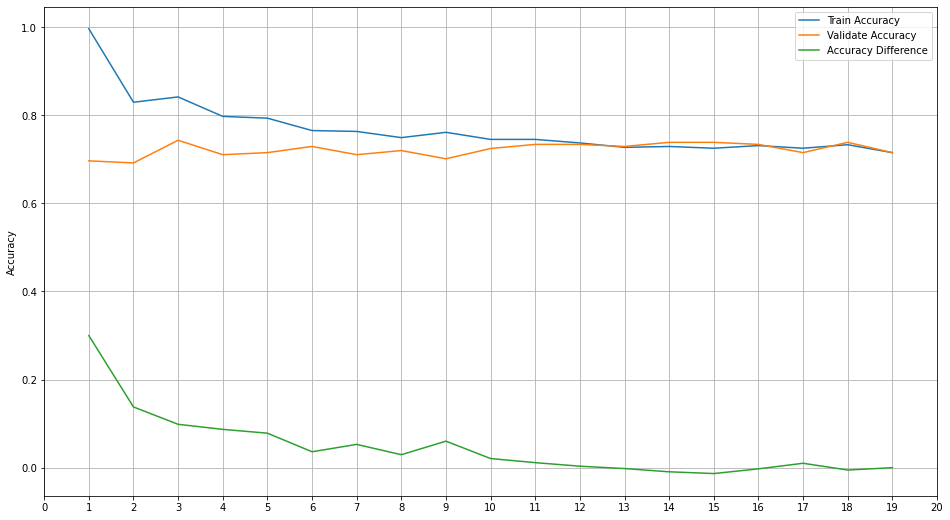

In [101]:
# plot the data
plt.figure(figsize=(16,9))
# plot train accuracy against k
plt.plot(eval_df.k, eval_df.train_accuracy, label='Train Accuracy')
# plot validate accuracy against k
plt.plot(eval_df.k, eval_df.validate_accuracy, label='Validate Accuracy')
# plot the difference against k
plt.plot(eval_df.k, eval_df.difference, label='Accuracy Difference')
plt.ylabel('Accuracy')
plt.legend()
plt.xticks(np.arange(0,21,1))
plt.grid()
plt.show()

Looking at this chart, I would select k=12 as the best model. 

In [103]:
k = 15
print(f'KNN where K = {k}' )

knn, y_train_pred, y_validate_pred = knn_fit_predict(k, 
                                                     X_train, 
                                                     y_train, 
                                                     X_validate)

print('Train Evaluation\n')
train_accuracy = evaluate_clf(knn, X_train, y_train, y_train_pred)

print('\nValidate Evaluation\n')
validate_accuracy = evaluate_clf(knn, X_validate, 
                                 y_validate, y_validate_pred)

KNN where K = 15
Train Evaluation

Accuracy: 0.7248995983935743
Confusion Matrix
          Pred 0  Pred 1
Actual 0     264      43
Actual 1      94      97
Classification Report
                    0           1  accuracy   macro avg  weighted avg
precision    0.737430    0.692857    0.7249    0.715144      0.720335
recall       0.859935    0.507853    0.7249    0.683894      0.724900
f1-score     0.793985    0.586103    0.7249    0.690044      0.714255
support    307.000000  191.000000    0.7249  498.000000    498.000000
Accuracy: 0.7248995983935743
True Positive Rate: 0.5078534031413613
False Positive Rate: 0.14006514657980457
True Negative Rate: 0.8599348534201955
False Negative Rate: 0.49214659685863876
Precision: 0.6928571428571428
Recall: 0.5078534031413613
F1 Score: 0.5861027190332326
Support (0): 191
Support (1): 307

Validate Evaluation

Accuracy: 0.7383177570093458
Confusion Matrix
          Pred 0  Pred 1
Actual 0     110      22
Actual 1      34      48
Classification Repor